# **Data Analyst Case - AMAZON.in Sales**

#### *Loading necessary packages for the analysis*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sqlalchemy import text

# *Loading the databases*

In [3]:
AmazonSales = pd.read_excel('Amazon Sales data.xlsx')


---

# **BUSINESS Analysis (Data Visualization)**

- #### Perform an exploratory analysis of the sales data
  
- #### understanding:

  - #### What type of data is available on the platform.
  
  - #### Understand how they can improve the business operations, and also the sales performance by keeping the inventory ready to meet the demand.

- ## **Cleaning the data**

- ### *Overall data information*

 #### `database.info()` - information about the data types and missing values.

 #### `database.describe()` - summary statistics of numerical columns.

---

In [4]:
AmazonSales.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
print(AmazonSales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

- #### The dataset contains 128975 entries (rows), ranging from index 0 to 128974.
- #### There are 24 columns in total, each representing a specific attribute of the data.
- #### The columns have different data types: int64 (integer), object (string or mixed types), float64 (floating-point numbers), and bool (boolean).
- #### Some columns have missing values (non-null counts are less than the total number of entries). For example, "Courier Status" has 6872 missing values, "Amount" and "currency" have 7795 missing values, and "fulfilled-by" has 89698 missing values.

#### The "Unnamed: 22" column appears to have a significant number of missing values (around 49,050) and might not be essential for analysis.

In [6]:
AmazonSales['Unnamed: 22'].unique()

array([nan,  0.])

#### **We can see that the column doesn't contain any relevant information. That's why I decided to remove it.**

In [7]:
AmazonSales.drop('Unnamed: 22', axis=1, inplace=True)

- ### **Handling missing values**

In [8]:
AmazonSales['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [9]:
AmazonSales['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [10]:
AmazonSales[['fulfilled-by', 'Fulfilment']].groupby('Fulfilment').count()

,fulfilled-by
Fulfilment,
Amazon,0
Merchant,39277


#### I have conducted research on the fulfillment methods utilized by Amazon, and I discovered that there are two different options provided to sellers: 'Fulfilled by Amazon' (FBA) and 'Easy Ship':

- #### **Fulfilled by Amazon (FBA)**: With FBA, sellers store their products in Amazon's fulfillment centers. When a customer places an order, Amazon handles the packaging, shipping, and customer service for those orders. This means that Amazon takes care of all aspects of order fulfillment on behalf of the seller.

- #### **Easy Ship:** Easy ship is also a fulfillment method provided by Amazon, but it differs from FBA in that the seller retains control of the inventory. Sellers using easy ship are responsible for storing, packaging, and labeling their products. However, once the seller has prepared the order, Amazon's delivery network picks up the package and handles the final delivery to the customer.

#### **For this reason and considering the analysis above, i dicided to fill the 'fulfilled-by' column with the value 'Amazon', using the `.fillna()` method in pandas to replace any missing or NaN values in the column with "Amazon".**

In [11]:
# Fill the 'fulfilled-by' column with 'Amazon'
AmazonSales['fulfilled-by'] = AmazonSales['fulfilled-by'].fillna('Amazon')


In [12]:
pd.pivot_table(AmazonSales, values="index", index=["fulfilled-by"], columns=["Fulfilment"], aggfunc='count', fill_value=0)

Fulfilment,Amazon,Merchant
fulfilled-by,,
Amazon,89698,0
Easy Ship,0,39277


---

In [13]:
print(AmazonSales['Amount'].isna().sum(), AmazonSales['currency'].isna().sum())

7795 7795


In [14]:
print(AmazonSales['Amount'].describe())

count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64


In [15]:
AmazonSales['currency'].unique()

array(['INR', nan], dtype=object)

#### The statistics above shows the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for the 'Amount' column. The mean 'Amount' is approximately 648.561465, with a standard deviation of around 281.211687.

- #### In the previous analysis we saw that the columns "Amount" and "currency" have 7795 missing values.

- #### **My decision is to replace the missing or NA (Not Available) values in the "Amount" column with the mean**, which is the average value calculated from the non-missing data. The mean is often a reasonable choice when dealing with continuous numerical data, as it represents the central tendency of the data, moreover i can ensure that the overall distribution and central tendency of the data are preserved.

- #### **For the "currency" column, I am replacing the missing values with "INR"**, the official currency of India, as all the data is related to this country, as we can see below.

In [16]:
AmazonSales['ship-country'].unique()

array(['IN', nan], dtype=object)

In [17]:
AmazonSales['Amount'] = AmazonSales['Amount'].fillna(AmazonSales['Amount'].mean())
AmazonSales['currency'] = AmazonSales['currency'].fillna('INR')

---

In [18]:
AmazonSales['promotion-ids'].isna().sum()

49153

#### The 'promotion-ids' column in the AmazonSales dataset would likely have a value for each sale or order indicating the promotion or campaign associated with that specific transaction. If a sale was made during a specific promotion, the 'promotion-ids' column would contain the corresponding promotion ID. If a sale was not associated with any ongoing promotion, the 'promotion-ids' column might have missing or NaN values.

- #### **My decision is to fill the missing or NA (Not Available) values in the "promotion-ids" column with 'No promotion'**, indicating that the sale was not associated with any ongoing promotion.

In [19]:
# Fill the 'promotion-ids' column with 'No promotion'
AmazonSales['promotion-ids'] = AmazonSales['promotion-ids'].fillna('No promotion')

---

In [20]:
AmazonSales['Courier Status'].isna().sum()

6872

In [21]:
AmazonSales['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

#### I am going to select this sample of 6872 data where the 'Courier Status' is missing and analyze them, trying to discover the reason they are missing.

In [22]:
missing_courier = AmazonSales.loc[AmazonSales['Courier Status'].isna()]

In [23]:
missing_courier['ship-service-level'].unique()

array(['Standard'], dtype=object)

In [24]:
missing_courier.groupby('Status')['index'].count()

Status
Cancelled                       6861
Shipped - Delivered to Buyer       8
Shipped - Returned to Seller       3
Name: index, dtype: int64

In [25]:
missing_courier.groupby('Fulfilment')['index'].count()

Fulfilment
Merchant    6872
Name: index, dtype: int64

In [26]:
missing_courier['Category'].unique()

array(['Set', 'Western Dress', 'kurta', 'Top', 'Blouse', 'Bottom',
       'Saree', 'Ethnic Dress'], dtype=object)

#### The courier status provides valuable information about the shipping and delivery progress of the orders.

#### We can observe that all the data where the courier status is missing has 'ship-service-level' equal to Standard and the column 'Status', representing the current stage of each order's processing and fulfillment, is mostly filled with the option 'Cancelled.' The other status options for this data are 'Shipped - Delivered to Buyer' and 'Shipped - Returned to Seller.' Consequently, these are considered Cancelled or Invalid Orders.

- #### Considering that orders canceled before the shipping process starts or orders with invalid information may lack a valid 'Courier Status', **I have decided to fill the missing or NA (Not Available) values in the 'Courier Status' column with 'Cancelled or Invalid Orders'**.

In [27]:
AmazonSales['Courier Status'] = AmazonSales['Courier Status'].fillna('Cancelled or Invalid Orders')

---

In [28]:
AmazonSales['ship-country'].isna().sum()

33

In [29]:
missing_country = AmazonSales.loc[AmazonSales['ship-country'].isna()]

In [30]:
total_in_missing_country = missing_country['Amount'].sum()
total_in_missing_country

19968.122929526326

In [31]:
total_in_AmazonSales = AmazonSales['Amount'].sum()
total_in_AmazonSales

83648214.91782884

In [32]:
(total_in_missing_country/total_in_AmazonSales)*100

0.023871546988948722

#### **After observe the data with the missing values, i decided to remove them, following this steps to proceed with the removal:**

- #### Calculate the total sum of amounts for all sales in the original dataset.

- #### Calculate the sum of amounts for the rows with missing "ship-country" values.

- #### Calculate the percentage of the sum of amounts represented by the rows with missing "ship-country" values i.e., (Sum of amounts with missing "ship-country") / (Total sum of amounts) * 100.

#### **Negligible Impact:** The 0.02% of sales represented by the rows with missing "ship-country" values is relatively small compared to the total sales. Removing these rows is unlikely to have a significant impact on the overall analysis results or the insights gained from the data.

#### **Data Integrity:** The presence of missing "ship-country" values might introduce uncertainties or inaccuracies in the analysis. By removing these rows, i ensure that the dataset used for analysis is more complete and reliable.

#### **Statistical Significance:** The missing values may not have a meaningful effect on statistical analysis, especially if the data size is large enough to maintain statistical power and confidence in the results, as we can see below, the mean of the amount barely changed.




In [33]:
AmazonSalesCleaned = AmazonSales.loc[AmazonSales['ship-country'].isna()==False]

In [34]:
AmazonSalesCleaned['Amount'].describe()

count    128942.000000
mean        648.572589
std         272.591354
min           0.000000
25%         459.000000
50%         635.000000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

In [35]:
AmazonSalesCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128942 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128942 non-null  int64  
 1   Order ID            128942 non-null  object 
 2   Date                128942 non-null  object 
 3   Status              128942 non-null  object 
 4   Fulfilment          128942 non-null  object 
 5   Sales Channel       128942 non-null  object 
 6   ship-service-level  128942 non-null  object 
 7   Style               128942 non-null  object 
 8   SKU                 128942 non-null  object 
 9   Category            128942 non-null  object 
 10  Size                128942 non-null  object 
 11  ASIN                128942 non-null  object 
 12  Courier Status      128942 non-null  object 
 13  Qty                 128942 non-null  int64  
 14  currency            128942 non-null  object 
 15  Amount              128942 non-nul

### **Handling duplicates:**
#### Checking for and removing any duplicate rows in the data:

In [36]:
AmazonSalesCleaned = AmazonSalesCleaned.drop_duplicates()
AmazonSalesCleaned.shape

(128942, 23)

#### **There are no duplicate rows in the data**

### **Converting data types:**

In [37]:
AmazonSalesCleaned['Date'] = pd.to_datetime(AmazonSalesCleaned['Date'])
AmazonSalesCleaned['Qty'] = AmazonSalesCleaned['Qty'].astype('int')
AmazonSalesCleaned['ship-postal-code'] = AmazonSalesCleaned['ship-postal-code'].astype('int')
AmazonSalesCleaned.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled or Invalid Orders,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No promotion,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled or Invalid Orders,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No promotion,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No promotion,False,Amazon


In [38]:
AmazonSalesCleaned["promotion_list"] = AmazonSalesCleaned["promotion-ids"].str[:21]

In [39]:
AmazonSalesCleaned['index'].groupby(AmazonSalesCleaned["promotion_list"]).count()

promotion_list
Amazon PLCC Free-Fina    32338
Duplicated A12RHGVGRW      489
Duplicated AYTJSBA8ZO      433
IN Core Free Shipping    46183
No promotion             49145
VPC-44571-38707197 Co       74
VPC-44571-38707597 Co       18
VPC-44571-38708638 Co       28
VPC-44571-41445473 Co       41
VPC-44571-41445498 Co       14
VPC-44571-41445527 Co       27
VPC-44571-41445561 Co       31
VPC-44571-44201687 Co       52
VPC-44571-44201770 Co       44
VPC-44571-44201853 Co       25
Name: index, dtype: int64

#### *Saving the data.*

In [45]:
AmazonSalesCleaned.to_excel('AmazonSalesCleaned.xlsx')

In [41]:
AmazonSalesCleaned['Date1'] = AmazonSalesCleaned['Date'].astype('str')
AmazonSalesCleaned['Date1'] = AmazonSalesCleaned['Date1'].str[:4]+AmazonSalesCleaned['Date1'].str[5:7]

In [42]:
AmazonSalesCleaned['Date1'].unique()

array(['202204', '202212', '202211', '202210', '202209', '202208',
       '202207', '202206', '202205', '202203', '202202', '202201'],
      dtype=object)

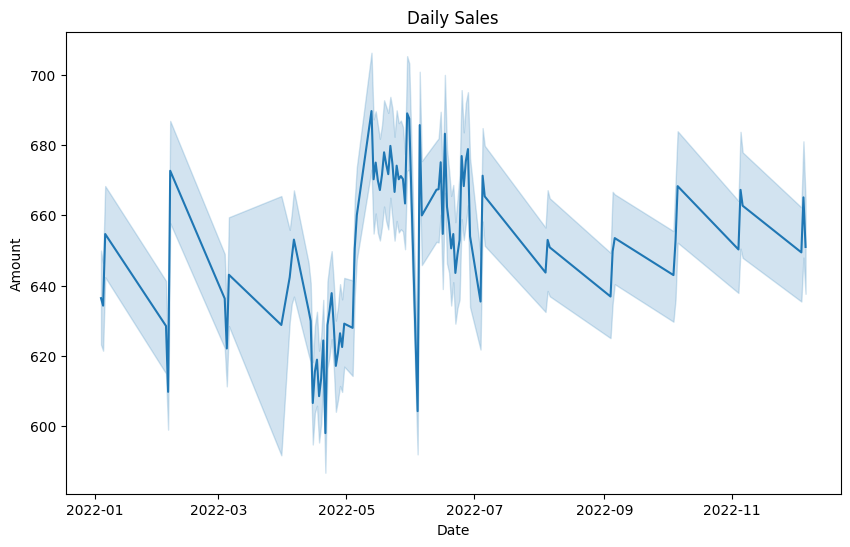

In [43]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Amount', data=AmazonSalesCleaned)
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

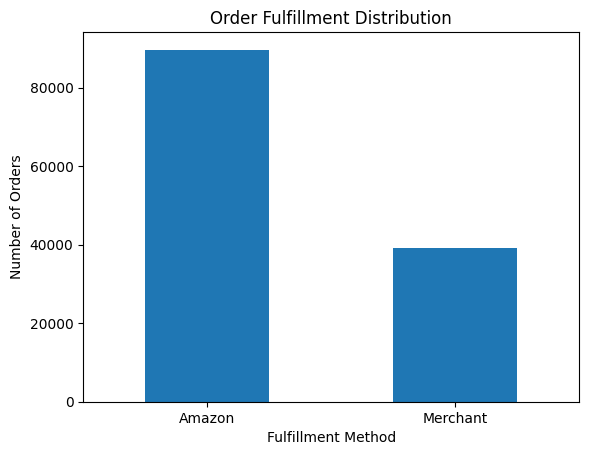

In [44]:
# Explore fulfillment methods
fulfillment_counts = AmazonSalesCleaned['Fulfilment'].value_counts()
fulfillment_counts.plot(kind='bar', rot=0)
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.title('Order Fulfillment Distribution')
plt.show()